In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate


# Load the CSV file into a DataFrame
df = pd.read_csv('Dev_ATT.csv')

# Drop the redundant numeric columns
df = df.drop(columns=[
    'Sex', 'School failure', 'WhatsApp', 'Facebook', 'Instagram', 'Twitter',
    'Snapchat', 'TikTok', 'Other social', 'Time spent on social media',
    'Daily use of social media', 'Which device', "Time's flow",
    'Perceived anxiety during SM use', 'Perceived loneliness ', 'SM checking',
    'Video-games and online play', 'Time spent on line playng videogames'
])

# Rename the columns
df = df.rename(columns={
    'Sex.1': 'Sex',
    'School Failure': 'School Failure',
    'Yes/No': 'WhatsApp',
    'Yes/No.1': 'Facebook',
    'Yes/No.2': 'Instagram',
    'Yes/No.3': 'Twitter',
    'Yes/NO': 'Snapchat',
    'Yes/No.4': 'TikTok',
    'Yes/No.5': 'Other social',
    'Unnamed: 20': 'Time spent on social media',
    'Yes/No.6': 'Daily use of social media',
    'Unnamed: 24': 'Device',
    'Unnamed: 26': "Time's flow",
    'Unnamed: 28': 'Perceived anxiety',
    'Unnamed: 30': 'Perceived loneliness',
    'Unnamed: 32': 'SM checking frequency',
    'Unnamed: 34': 'Video-games and online play',
    'Unnamed: 36': 'Time spent on videogames',
    'BSMAS cut-off underlined': 'BSMAS cut-off',
    ' STAI Y-1': 'STAI Y-1',
    'STAI Y-2': 'STAI Y-2'
})

# Strip leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Display the first 5 rows and the info of the cleaned DataFrame
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| Sex    | Age   | School Failure   | WhatsApp   | Facebook   | Instagram   | Twitter   | Snapchat   | TikTok   | Other social   | Time spent on social media   | Daily use of social media   | Device                  | Time's flow   | Perceived anxiety   | Perceived loneliness   | SM checking frequency                                      | Video-games and online play   | Time spent on videogames   | BSMAS   | BSMAS cut-off   | RSES   | CSIQ-A   | STAI Y-1   | STAI Y-2   |
|:-------|:------|:-----------------|:-----------|:-----------|:------------|:----------|:-----------|:---------|:---------------|:-----------------------------|:----------------------------|:------------------------|:--------------|:--------------------|:-----------------------|:-----------------------------------------------------------|:------------------------------|:---------------------------|:--------|:----------------|:-------|:---------|:-----------|:-----------|
| Female | 18    | No               | Yes     

# **Central Tendencies**

In [8]:
print("\n" + "="*40)
print("CENTRAL TENDENCIES".center(40))
print("="*40 + "\n")

numerical_cols = df.select_dtypes(include=['number']).columns
ct_data = []
for col in numerical_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    ct_data.append([col, f"{mean_val:.2f}", f"{median_val:.2f}", mode_val])

headers = ["Column", "Mean", "Median", "Mode"]
print(tabulate(ct_data, headers=headers, tablefmt="pretty", colalign=("left", "right", "right", "right")))



           CENTRAL TENDENCIES           

+---------------+-------+--------+------+
| Column        |  Mean | Median | Mode |
+---------------+-------+--------+------+
| Age           | 17.42 |  17.00 |   18 |
| BSMAS         | 13.07 |  13.00 |   13 |
| BSMAS cut-off | 13.07 |  13.00 |   13 |
| RSES          | 16.59 |  17.00 |   19 |
| CSIQ-A        | 21.35 |  21.00 |   25 |
| STAI Y-1      | 43.50 |  43.00 |   41 |
| STAI Y-2      | 47.05 |  47.00 |   45 |
+---------------+-------+--------+------+


# **Pivot Table**

In [9]:
print("\n\n" + "="*40)
print("PIVOT TABLE ANALYSIS".center(40))
print("="*40 + "\n")

# Example 1: Average BSMAS Score by Sex and Daily Social Media Use
print("--- Average BSMAS Score by Sex and Daily Social Media Use ---\n")
pivot_table1 = df.pivot_table(
    values='BSMAS',
    index='Sex',
    columns='Daily use of social media',
    aggfunc='mean'
)
# Fill NaN values with '-' for better readability in the table
print(tabulate(pivot_table1.fillna('-'), headers='keys', tablefmt="pretty", floatfmt=".2f"))

# Example 2: Average STAI Y-1 Score by School Failure and Time spent on social media
print("\n\n--- Average STAI Y-1 Score by School Failure and Time spent on social media ---\n")
pivot_table2 = df.pivot_table(
    values='STAI Y-1',
    index='School Failure',
    columns='Time spent on social media',
    aggfunc='mean'
)
print(tabulate(pivot_table2.fillna('-'), headers='keys', tablefmt="pretty", floatfmt=".2f"))



          PIVOT TABLE ANALYSIS          

--- Average BSMAS Score by Sex and Daily Social Media Use ---

+--------+--------------------+--------------------+
|  Sex   |         NO         |        Yes         |
+--------+--------------------+--------------------+
| Female |        14.0        | 13.39568345323741  |
|  Male  | 11.909090909090908 | 12.642857142857142 |
+--------+--------------------+--------------------+


--- Average STAI Y-1 Score by School Failure and Time spent on social media ---

+----------------+-------+--------------------+-------------------+-------------------+-------------------+-------+
| School Failure |  0-2  |     10 or more     |        2-4        |        4-6        |        6-8        | 8-10  |
+----------------+-------+--------------------+-------------------+-------------------+-------------------+-------+
|       No       | 44.95 | 45.833333333333336 |       44.5        | 42.41025641025641 | 42.57142857142857 | 42.5  |
|      Yes       | 44.0  |  

# **Graphs**

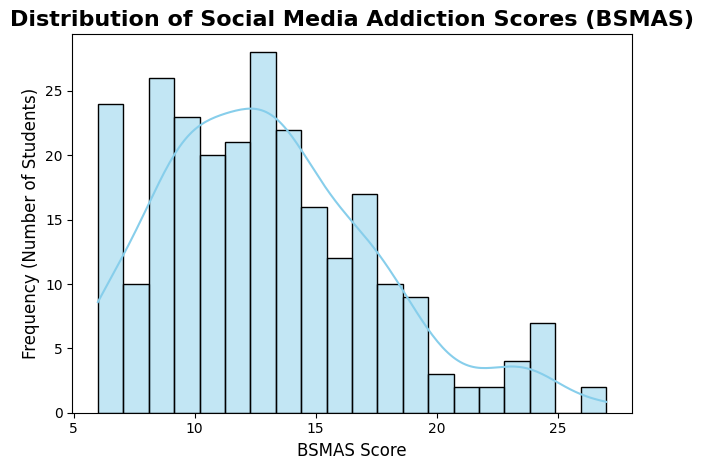

In [16]:
# 3. Create Histogram
# We use BSMAS (likely 'Bergen Social Media Addiction Scale') as the variable of interest
sns.histplot(data=df, x='BSMAS', kde=True, bins=20, color='skyblue', edgecolor='black')

# 4. Add Labels and Title
plt.title('Distribution of Social Media Addiction Scores (BSMAS)', fontsize=16, weight='bold')
plt.xlabel('BSMAS Score', fontsize=12)
plt.ylabel('Frequency (Number of Students)', fontsize=12)

# 5. Show Plot
plt.tight_layout()
plt.show()

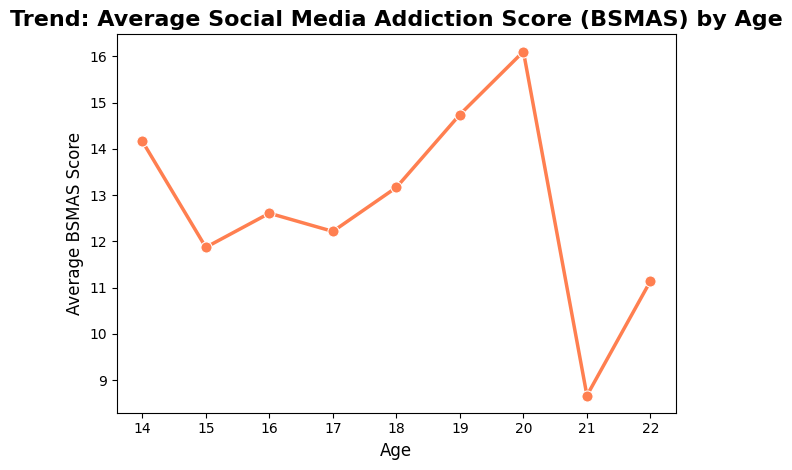

In [17]:
sns.lineplot(x=avg_bsmas_by_age.index, y=avg_bsmas_by_age.values, marker='o', markersize=8, color='coral', linewidth=2.5)

# 5. Add Labels and Title
plt.title('Trend: Average Social Media Addiction Score (BSMAS) by Age', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average BSMAS Score', fontsize=12)

# Ensure integer ticks on x-axis for Age
plt.xticks(avg_bsmas_by_age.index)

# 6. Show Plot
plt.tight_layout()
plt.show()

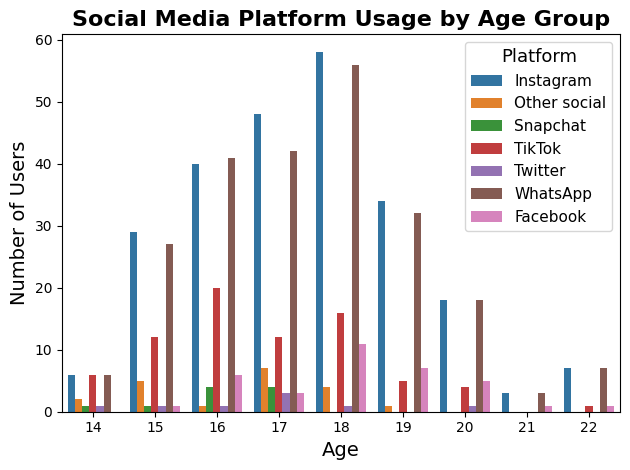

In [21]:
platform_usage = df[['Age', 'WhatsApp', 'Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Other social']].copy()

# Melt the dataframe to long format
melted_df = platform_usage.melt(id_vars=['Age'], var_name='Platform', value_name='Usage')

# Filter only where Usage indicates 'Yes'.
# Robust filtering to catch both common affirmative values.
melted_df['Usage'] = melted_df['Usage'].apply(lambda x: str(x).strip() if isinstance(x, str) else x)
usage_df = melted_df[melted_df['Usage'].isin([1, 'Yes', 'yes', 'YES'])]

if len(usage_df) == 0:
    print("\nWARNING: No data found for plotting after filtering. Check the 'Usage' values.")
else:
    # Count number of users per Age and Platform
    age_platform_counts = usage_df.groupby(['Age', 'Platform']).size().reset_index(name='Count')

    # 4. Create Grouped Bar Graph
    # Changed palette to 'tab10' for more distinct colors
    sns.barplot(data=age_platform_counts, x='Age', y='Count', hue='Platform', palette='tab10')

    # 5. Add Labels and Title
    plt.title('Social Media Platform Usage by Age Group', fontsize=16, weight='bold')
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Number of Users', fontsize=14)
    plt.legend(title='Platform', title_fontsize='13', fontsize='11')

    # 6. Show Plot
    plt.tight_layout()
    plt.show()

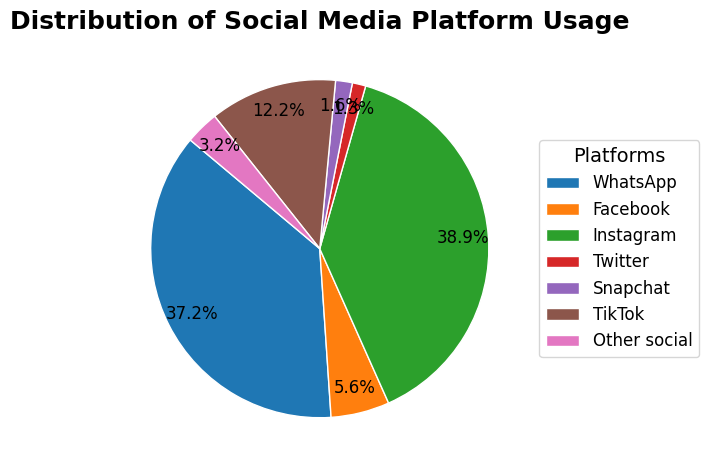

In [23]:
platform_cols = ['WhatsApp', 'Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Other social']
platform_counts = {}

for col in platform_cols:
    # Count 'Yes', 'yes', 'YES', or 1 as usage
    count = df[col].apply(lambda x: str(x).strip().lower() in ['1', 'yes']).sum()
    platform_counts[col] = count

counts_series = pd.Series(platform_counts)

# 4. Create Pie Chart
# Use 'tab10' palette to match the bar graph
colors = sns.color_palette('tab10')

# Create the pie chart WITHOUT labels on the wedges themselves to avoid overlap
wedges, texts, autotexts = plt.pie(
    counts_series,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85,  # Move percentage labels closer to center
    textprops={'fontsize': 12}
)

# 5. Add Legend (Color Scale)
# Place legend outside the pie chart to the right
plt.legend(
    wedges,
    counts_series.index,
    title="Platforms",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12,
    title_fontsize=14
)

# 6. Add Title
plt.title('Distribution of Social Media Platform Usage', fontsize=18, weight='bold')

# 7. Show Plot
plt.tight_layout()
plt.show()

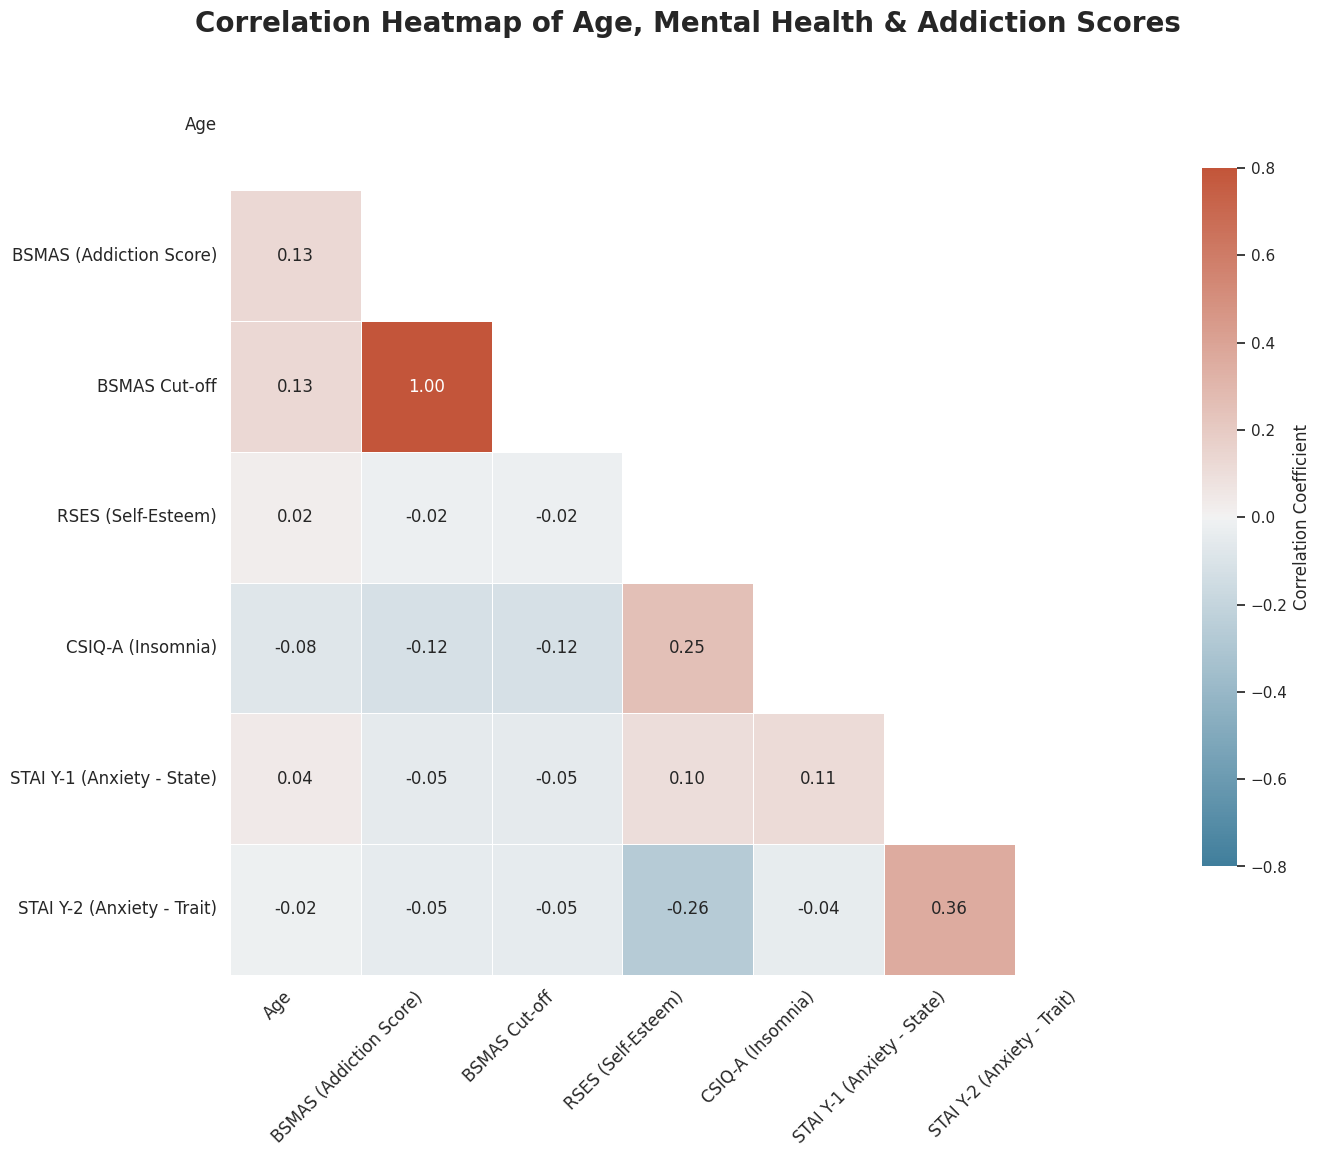

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set aesthetic style
sns.set_theme(style="white")
plt.figure(figsize=(14, 12))  # Increased figure size for better readability

# 1. Load Data
df = pd.read_csv('Dev_ATT.csv')

# 2. Quick Clean - CRITICAL STEP: Strip whitespace from ALL column names immediately
df.columns = df.columns.str.strip()

# Keep 'Age' this time as it might be interesting
df_clean = df.drop(columns=[
    'Sex', 'School failure', 'WhatsApp', 'Facebook', 'Instagram', 'Twitter',
    'Snapchat', 'TikTok', 'Other social', 'Time spent on social media',
    'Daily use of social media', 'Which device', "Time's flow",
    'Perceived anxiety during SM use', 'Perceived loneliness', 'SM checking',
    'Video-games and online play', 'Time spent on line playng videogames',
    'Sex.1', 'School Failure', 'Yes/No', 'Yes/No.1', 'Yes/No.2', 'Yes/No.3',
    'Yes/NO', 'Yes/No.4', 'Yes/No.5', 'Unnamed: 20', 'Yes/No.6', 'Unnamed: 24',
    'Unnamed: 26', 'Unnamed: 28', 'Unnamed: 30', 'Unnamed: 32', 'Unnamed: 34',
    'Unnamed: 36'
], errors='ignore')

# Select numerical columns for correlation, explicitly including Age if it's not automatically picked up
numerical_df = df_clean.select_dtypes(include=['number']).copy() # Use .copy() to avoid SettingWithCopyWarning

# Rename columns for better readability in heatmap
numerical_df = numerical_df.rename(columns={
    'Age': 'Age',
    'BSMAS': 'BSMAS (Addiction Score)',
    'BSMAS cut-off underlined': 'BSMAS Cut-off',
    'STAI Y-1': 'STAI Y-1 (Anxiety - State)',
    'STAI Y-2': 'STAI Y-2 (Anxiety - Trait)',
    'RSES': 'RSES (Self-Esteem)',
    'CSIQ-A': 'CSIQ-A (Insomnia)'
})

# 3. Calculate Correlation Matrix
corr = numerical_df.corr()

# 4. Create Heatmap
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
# Use a diverging color palette that is pleasing to the eye (e.g., 'vlag', 'coolwarm', 'RdBu_r')
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0, vmin=-.8,
            square=True, linewidths=.5, cbar_kws={"shrink": .7, "label": "Correlation Coefficient"},
            annot=True, fmt=".2f", annot_kws={"size": 12}) # Increased annotation size

plt.title('Correlation Heatmap of Age, Mental Health & Addiction Scores', fontsize=20, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 5. Show Plot
plt.tight_layout()
plt.show()

Here is a brief summary of each key parameter/column in your dataset:

**Age**: Represents the age of the respondent in years. It's used to analyze trends and differences across different age groups.

BSMAS (Addiction Score): Stands for Bergen Social Media Addiction Scale. It's a numerical score measuring the level of addiction to social media.

**BSMAS Cut-off:** A threshold value for the BSMAS score. Scores above this likely indicate a clinical level of social media addiction.

**STAI Y-1 (Anxiety - State):** State-Trait Anxiety Inventory (State). Measures the current, temporary level of anxiety a person is feeling right now.

**STAI Y-2 (Anxiety - Trait):** State-Trait Anxiety Inventory (Trait). Measures a person's general, long-term tendency to feel anxious.

**RSES (Self-Esteem):** Rosenberg Self-Esteem Scale. A numerical score that measures a person's overall sense of self-worth or self-esteem.

**CSIQ-A (Insomnia):** Consensus Sleep Diary - Insomnia. A score likely measuring the severity of insomnia or sleep-related problems.

**Sex**: The gender of the respondent (e.g., Male, Female). Used for demographic analysis and comparing groups.

**School Failure:** Indicates if the respondent has experienced school failure (e.g., Yes/No). Used to see if academic struggle correlates with other factors.

**Platform Usage (WhatsApp, Facebook, etc.):** Columns indicating whether a respondent uses a specific social media platform.

**Time spent on social media:** A categorical or numerical range indicating how much time is spent on social media daily.

**Daily use of social media:** A Yes/No indicator of whether social media is used every single day.

Device: The primary device used to access social media (e.g., Smartphone, Computer).

**Time's flow:** A subjective measure of how fast time seems to pass while using social media.

**Perceived anxiety/loneliness:** Self-reported feelings of anxiety or loneliness specifically while using social media.

**SM checking frequency:** How often a respondent checks their social media accounts.

**Video-games and online play:** Indicates engagement with video games.

**Time spent on videogames:** The amount of time spent playing video games.